In [1]:
import matplotlib.pyplot as plt
import mrcfile
import pooch
import torch
from torch_find_peaks.find_peaks import find_peaks_3d
from torch_find_peaks.refine_peaks import refine_peaks_3d

In [2]:

tomo = pooch.retrieve("https://ftp.ebi.ac.uk/pub/databases/emdb/structures/EMD-25061/map/emd_25061.map.gz",known_hash=None)


In [3]:
with mrcfile.open(tomo, mode='r') as mrc:
    # print the map header
    tomo_data = torch.tensor(mrc.data).to("cuda:0")


In [4]:
with torch.inference_mode():
    # Find peaks in the 3D volume
    peak_data = find_peaks_3d(
                volume = -1. * tomo_data + torch.randn_like(tomo_data,dtype=torch.float32) * 0.001,
                threshold_abs=30,
                min_distance=5,
                return_as="dataframe"
            )

In [5]:
peak_data

,z,y,x,height
0,55.0,1446.0,515.0,128.003265
1,61.0,1449.0,516.0,128.001999
2,105.0,1052.0,247.0,128.001465
3,113.0,1185.0,134.0,61.999825
4,114.0,1211.0,154.0,69.000458
...,...,...,...,...
263,437.0,206.0,535.0,113.000702
264,448.0,149.0,634.0,87.997681
265,451.0,459.0,154.0,86.999817
266,457.0,473.0,177.0,122.000229


In [6]:
import imodmodel

imodmodel.write(peak_data, "test.mod")

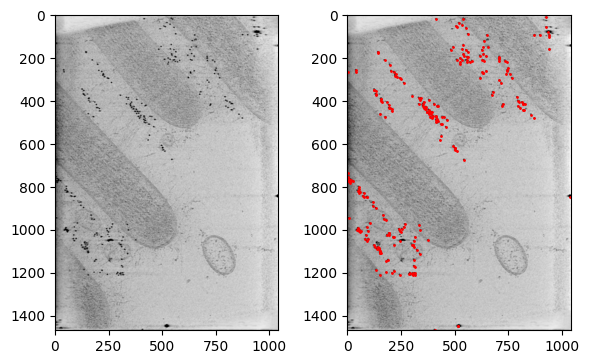

In [7]:
fig, [pl1, pl2] = plt.subplots(1, 2, figsize=(6, 4))
tomo_data_cpu = tomo_data.cpu()
pl1.imshow(torch.min(tomo_data_cpu, dim=0).values, cmap='gray',interpolation='mitchell', vmin=0, vmax=70)
pl2.imshow(torch.min(tomo_data_cpu, dim=0).values, cmap='gray',interpolation='mitchell', vmin=0, vmax=70)
pl2.plot(peak_data['x'],peak_data['y'], 'r.', markersize=2)
plt.tight_layout()
plt.show()

In [9]:
refined_peak_data = refine_peaks_3d(
    volume = -1. * tomo_data + torch.randn_like(tomo_data,dtype=torch.float32) * 0.001,
    peak_coords= peak_data,
    return_as="dataframe",
    boxsize=10
)

torch.Size([268, 7])
torch.Size([268, 7])


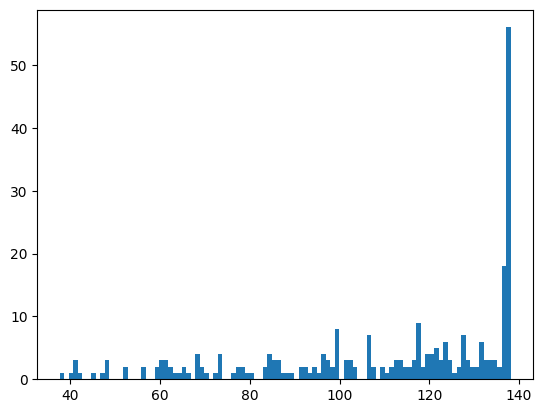

In [12]:
plt.hist(refined_peak_data['amplitude'], bins=100)
pass

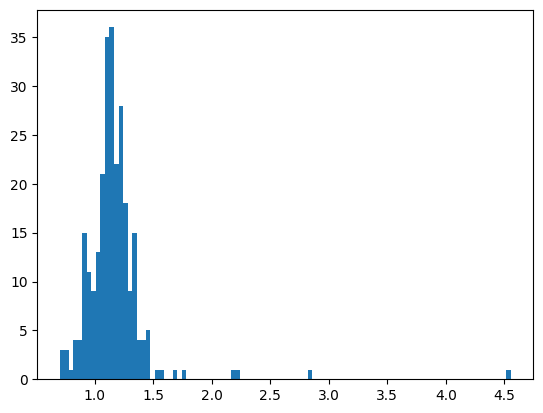

In [13]:
plt.hist(refined_peak_data['sigma_x'], bins=100)
pass

(array([ 1.,  3.,  4.,  8., 13., 26., 14., 40., 55., 55., 22., 16.,  3.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([0.58873951, 0.64283109, 0.6969226 , 0.75101411, 0.80510569,
        0.85919726, 0.91328877, 0.96738029, 1.02147186, 1.07556343,
        1.12965488, 1.18374646, 1.23783803, 1.2919296 , 1.34602118,
        1.40011263, 1.4542042 , 1.50829577, 1.56238723, 1.6164788 ,
        1.67057037, 1.72466195, 1.7787534 , 1.83284497, 1.88693655,
        1.94102812, 1.99511969, 2.04921103, 2.10330272, 2.15739441,
        2.21148586, 2.2655

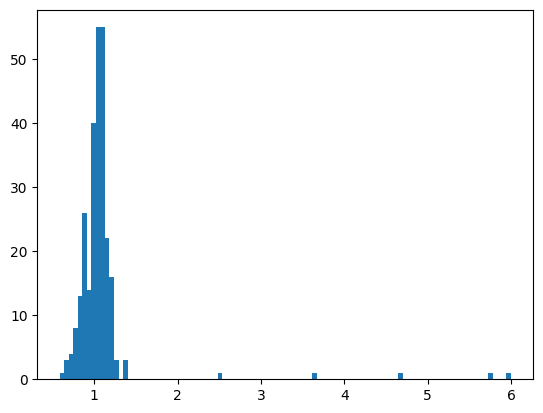

In [14]:
plt.hist(refined_peak_data['sigma_y'], bins=100)

(array([ 3.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
         4.,  0.,  1.,  1.,  0.,  2.,  2.,  4.,  3.,  0.,  5.,  5.,  0.,
         1.,  3.,  2.,  2.,  1.,  2.,  1.,  5.,  1.,  5.,  2.,  2.,  7.,
         7.,  3.,  6.,  5.,  5.,  8., 15., 11.,  4., 14.,  5., 13.,  7.,
         9., 10.,  6.,  6.,  9.,  9.,  7.,  2.,  5.,  4.,  4.,  2.,  3.,
         4.,  1.,  2.,  2.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([1.17592347, 1.22458911, 1.27325475, 1.32192039, 1.37058604,
        1.41925168, 1.46791732, 1.51658297, 1.56524861, 1.61391425,
        1.66257989, 1.71124554, 1.75991106, 1.80857682, 1.85724235,
        1.90590811, 1.95457363, 2.00323939, 2.05190492, 2.10057068,
        2.1492362 , 2.19790173, 2.24656749, 2.29523325, 2.34389877,
        2.3925643 , 2.44123006, 2.48989582, 2.53856134, 2.58722687,
        2.63589263, 2.6845

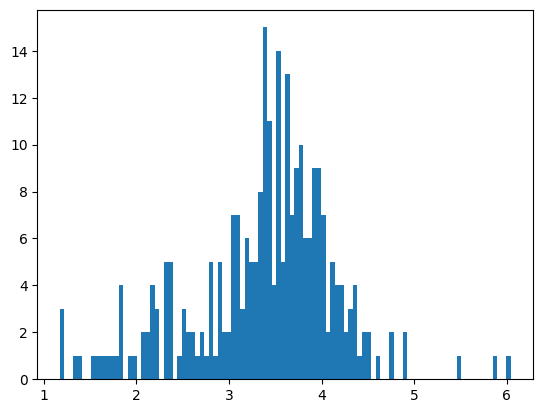

In [15]:
plt.hist(refined_peak_data['sigma_z'], bins=100)